In [76]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [77]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [78]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [79]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [80]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables

Base.prepare(engine, reflect = True)

In [81]:
# View all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [82]:
# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station

In [83]:
# Create our session (link) from Python to the DB

session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [84]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [85]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set

year_2012_query = list(np.ravel(calc_temps('2012-08-01', '2012-08-07')))
year_2012_query

[67.0, 74.97826086956522, 82.0]

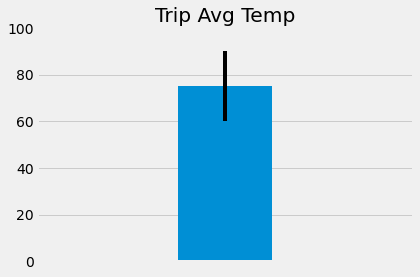

In [86]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

plt.bar(height = year_2012_query[1], yerr = (year_2012_query[2] - year_2012_query[0]), x = 0, width = 1)
plt.title("Trip Avg Temp")
plt.xticks([], labels = "Hawaii")
plt.xlim(-2, 2)
plt.ylim(0, 100)
plt.show()

### Daily Rainfall Average

In [87]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

sel = [Measurement.station, Measurement.prcp, Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation]

rainfall_query = session.query(*sel).filter(Measurement.station == Station.station).\
    filter(Measurement.date >= '2012-01-01').filter(Measurement.date <= '2012-12-31').all()
rainfall_query

[('USC00519397',
  0.0,
  'USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0),
 ('USC00519397',
  0.0,
  'USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0),
 ('USC00519397',
  0.0,
  'USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0),
 ('USC00519397',
  0.0,
  'USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0),
 ('USC00519397',
  0.0,
  'USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0),
 ('USC00519397',
  0.0,
  'USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0),
 ('USC00519397',
  0.0,
  'USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0),
 ('USC00519397',
  0.0,
  'USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0),
 ('USC00519397',
  0.0,
  'USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0),
 ('USC00519397',
  0.0,
  'USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0),
 ('USC0051

In [88]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [89]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
normals = []

# Set the start and end date of the trip
start_date = dt.datetime.strptime('2020-08-01', '%Y-%m-%d')
end_date = dt.datetime.strptime('2020-08-07', '%Y-%m-%d')

# Use the start and end date to create a range of dates
numdays = 7
date_list = [start_date + dt.timedelta(days = x) for x in range(numdays)]

# Strip off the year and save a list of strings in the format %m-%d
string_list = [dt.date.strftime(x, "%m-%d") for x in date_list]

# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.
normals = [daily_normals(x) for x in string_list]
print(normals)

[[(67.0, 75.54, 83.0)], [(68.0, 75.60377358490567, 84.0)], [(70.0, 76.61111111111111, 85.0)], [(69.0, 76.71153846153847, 84.0)], [(69.0, 76.14814814814815, 82.0)], [(67.0, 76.25, 83.0)], [(71.0, 77.15686274509804, 83.0)]]


In [74]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

tmin_list = []
tavg_list = []
tmax_list = []

# Unzip tuples

for normal in normals:
    tmin_list.append(normal[0][0])
    tavg_list.append(normal[0][1])
    tmax_list.append(normal[0][2])

trip_df = pd.DataFrame(
    {"tmin": tmin_list,
     "tavg": tavg_list,
     "tmax": tmax_list},
    index = date_list
     )
trip_df

,tmin,tavg,tmax
2017-08-01,67.0,75.540000,83.0
2017-08-02,68.0,75.603774,84.0
2017-08-03,70.0,76.611111,85.0
2017-08-04,69.0,76.711538,84.0
2017-08-05,69.0,76.148148,82.0
2017-08-06,67.0,76.250000,83.0
2017-08-07,71.0,77.156863,83.0


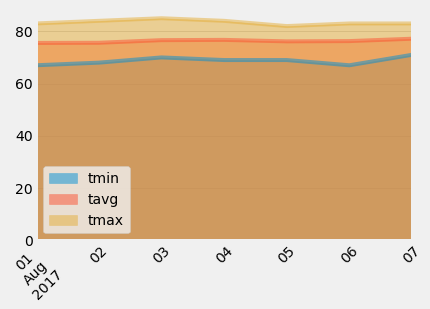

In [93]:
# Plot the daily normals as an area plot with `stacked=False`

trip_df.plot(kind = 'area', stacked = False, rot = 45)
plt.show()

## Close Session

In [ ]:
session.close()